In [1]:
import numpy as np
import pandas as pd

import pytraj as pt


%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt

import pickle
import os
import sys

from glob import glob

import free_energy_clustering as FEC

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

In [3]:
indir1 = '../1-Trajectories/2-NoEq_with_IPA'
indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list=traj_list1+traj_list2
traj_list

['../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_07.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_08.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_09.nc',
 '../1-Trajectories/2-NoEq_with_IPA/closed_ipa_dry_10.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_01.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_02.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_03.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_04.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_05.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_06.nc',
 '../1-Trajectories/2-NoEq_with_IPA/open_ipa_dry_07.nc',
 '../1-Traj

In [5]:
traj = pt.iterload(traj_list, topfile, stride=1)
# traj.save('./3-concatenated_trajectories/traj_noeq_IPA_combined_dt1.nc', overwrite=True)

KeyboardInterrupt: 

In [ ]:
traj= pt.iterload('./3-concatenated_trajectories/traj_noeq_IPA_combined_dt1.nc', topfile, stride=1)

In [6]:
traj

pytraj.TrajectoryIterator, 834825 frames: 
Size: 52.396698 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [7]:
rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")

rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)

rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")


In [8]:
Z=[]
for i in range(0,len(rmsd_open)):
    a=np.array([rmsd_closed[i],rmsd_open[i]])
    Z.append(a)
Z=np.array(Z)


In [9]:
Z

array([[1.94499767, 2.87750218],
       [2.00716248, 2.94853271],
       [1.88020676, 2.8148344 ],
       ...,
       [3.03157155, 1.68762209],
       [3.08150111, 1.68004149],
       [3.24253   , 1.81464885]])

In [10]:
with open('./pickled/1-With_IPA/1_Z_dt1_clean.pickle', 'wb') as outf:
    pickle.dump(Z, outf)
    
# with open('./pickled/1-With_IPA/1_Z_dt1_clean.pickle', 'rb') as inf:
#     Z = pickle.load(inf)

In [11]:
fec = FEC.FreeEnergyClustering(Z, min_n_components=17, max_n_components=17, temperature=293.15,
                               x_lims=[[0.0,4.5],[0.0,4.5]],
                               n_iterations=5, n_grids=150, n_splits=1,stack_landscapes=False)

*----------------Gaussian mixture model free energy estimator----------------*
   n_splits = 1
   shuffle_data = False
   n_iterations = 5
   n_grids = 150
   covergence_tol = 0.0001
   stack_landscapes = False
   x_lims (axes limits) = [[0.0, 4.5], [0.0, 4.5]]
   temperature = 293.15
   min_n_components = 17
   max_n_components = 17
   n_components_step = 1
   Using weighted data: False
*----------------------------------------------------------------------------*


In [12]:
coords, FE_landscape, FE_points = fec.landscape()

Estimating density with GMM.
# Components = 17
Identifying final model with 17 components.
Evaluating density in landscape
Density grid shape: [150, 150]


In [13]:
with open('./pickled/1-With_IPA/coords_dt1_clean.pickle', 'wb') as outf:
    pickle.dump(coords, outf)
with open('./pickled/1-With_IPA/FE_landscape_dt1_clean.pickle', 'wb') as outf:
    pickle.dump(FE_landscape, outf)
with open('./pickled/1-With_IPA/FE_points_dt1_clean.pickle', 'wb') as outf:
    pickle.dump(FE_points, outf)
    
# with open('./pickled/1-With_IPA/coords_dt1_clean.pickle', 'rb') as inf:
#     coords = pickle.load(inf)
# with open('./pickled/1-With_IPA/FE_landscape_dt1_clean.pickle', 'rb') as inf:
#     FE_landscape = pickle.load(inf)
# with open('./pickled/1-With_IPA/FE_points_dt1_clean.pickle', 'rb') as inf:
#     FE_points = pickle.load(inf)

# fec.FE_points_ = np.copy(FE_landscape)
# fec.FE_landscape_ = np.copy(FE_landscape)
# fec.coords_ = coords    

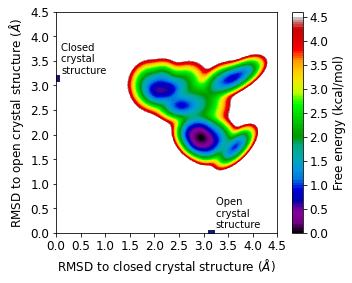

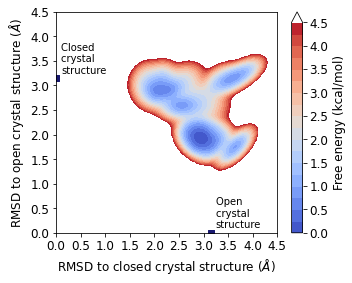

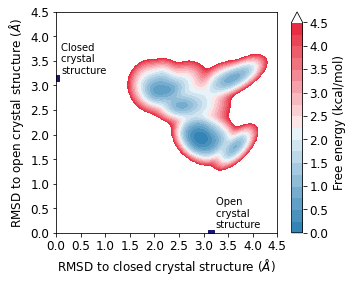

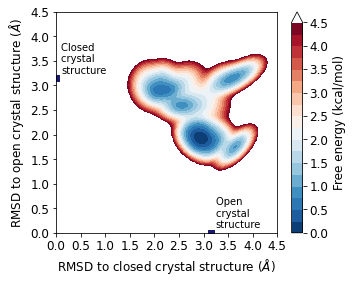

In [23]:
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v1', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='coolwarm', lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v2', ax=None)

import seaborn as sns
sns_cmap=sns.diverging_palette(240, 10, n=19, l=50, s=90, as_cmap=True)
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.50, colormap=sns_cmap, lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v3', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap='RdBu_r', lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v4', ax=None)



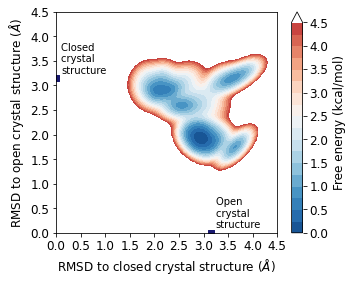

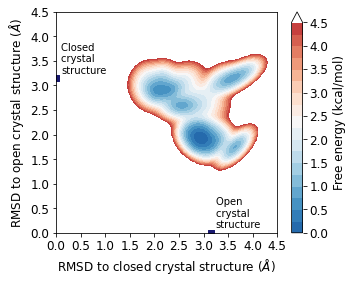

In [31]:
diverging_colors = sns.color_palette("RdBu_r", 20)
test_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[0:-2])
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap=test_cmap, lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v5', ax=None)

diverging_colors = sns.color_palette("RdBu_r", 21)
test_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors[1:-2])
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap=test_cmap, lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              filename='./plots/1-With_IPA/1-free_energy_landscape_with_IPA_dt1_clean_v6', ax=None)

In [15]:
labels, cluster_centers = fec.cluster(coords, FE_points,Z, assign_transition_points=True)
print("Cluster center indices: "+str(cluster_centers))

Clustering free energy landscape...
Computing Hessians of density landscape.
Point: 22500/22500
Constructing connected components.
# Graph connections: 7918.0
Clustering data points.
Cluster labels: [0. 1. 2. 3. 4. 5.]
Assigning cluster indices to non-core cluster points.
Done clustering.
Cluster center indices: [611950 463666 230050 549982 434949]


In [42]:
# with open('./pickled/1-With_IPA/labels_dt1_alldata_clean.pickle', 'wb') as outf:
#     pickle.dump(labels, outf)
# with open('./pickled/1-With_IPA/cluster_centers_dt1_alldata_clean.pickle', 'wb') as outf:
#     pickle.dump(cluster_centers, outf)
    
with open('./pickled/1-With_IPA/labels_dt1_alldata_clean.pickle', 'rb') as inf:
    labels=pickle.load(inf)
with open('./pickled/1-With_IPA/cluster_centers_dt1_alldata_clean.pickle', 'rb') as inf:
    cluster_centers=pickle.load(inf)
    
fec.labels_ = np.copy(labels)
fec.cluster_centers_ = np.copy(cluster_centers)
  

/mnt/storage/scratch/el14718/10-ALKEIG/12-Analysis_4/4-InfleCS_clustering/free_energy_clustering/GMM_free_energy.py:632: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  edgecolor=core_point_edgecolor, cmap=my_cmap2, label='Intermediate state',alpha=core_point_alpha)
/mnt/storage/scratch/el14718/10-ALKEIG/12-Analysis_4/4-InfleCS_clustering/free_energy_clustering/GMM_free_energy.py:665: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  linewidth=clust_point_linewidth, facecolor=clust_point_facecolor,edgecolor=clust_point_edgecolor, label='Cluster center')


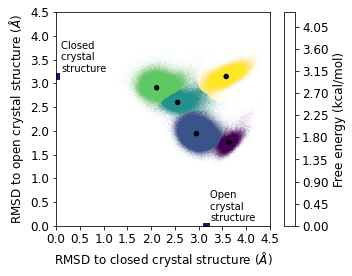

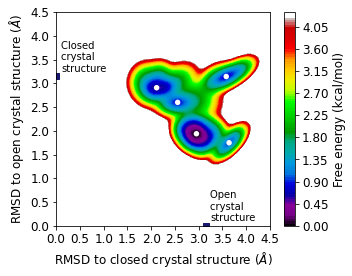

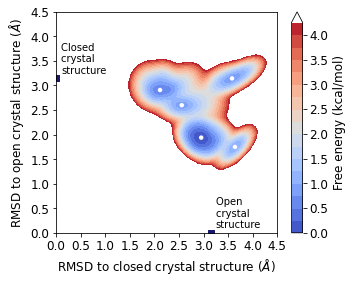

In [43]:
# Visualize free energy landscape with cluster labels
fec.pathways_ = None
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.05, core_point_edgecolor='', 
              colormap2='viridis',clust_point_edgecolor='', clust_point_facecolor='k', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=0.0,
              filename='./plots/1-With_IPA/3-free_energy_landscape_with_IPA_cluster_dt1_clean_v1.png', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='', 
              colormap2='jet',clust_point_edgecolor='', clust_point_facecolor='w', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-free_energy_landscape_with_IPA_cluster_dt1_clean_v2.png', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='coolwarm', lim=0.1, n_contour_levels=19, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='', 
              colormap2='jet',clust_point_edgecolor='', clust_point_facecolor='w', 
              clust_point_size=20, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/3-free_energy_landscape_with_IPA_cluster_dt1_clean_v3.png', ax=None)

In [18]:
# Computing state populations
state_populations = fec.population_states(n_sampled_points=1000000)
state_populations

Sampling points from density.
Assigning cluster labels based on precomputed density model clustering.
Computing state populations.


array([0.06448321, 0.46077167, 0.        , 0.09646894, 0.26740783,
       0.11086835])

([<matplotlib.axis.XTick at 0x2afee4e58e10>,
 <a list of 6 Text major ticklabel objects>)

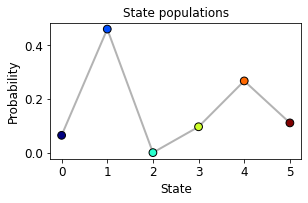

In [19]:
plt.figure(figsize=[4.5,2.5]);

plt.plot(np.arange(0,state_populations.shape[0]),
         state_populations[0::]/state_populations.sum(),
         linewidth=2,color=[0.7,0.7,0.7],zorder=-1)

plt.scatter(np.arange(0,state_populations.shape[0]),
            state_populations[0::]/state_populations.sum(),
            s=60,c=np.arange(0,state_populations.shape[0]),cmap='jet',edgecolor='k')

plt.title('State populations',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xticks(np.arange(0,state_populations.shape[0]))

In [44]:
labels_old=labels
cluster_centers_old=cluster_centers

In [52]:
labels=labels_old
fec.labels_ = np.copy(labels)

In [63]:
i=1
threshold=0.5

cluster_FE = FE_points[labels==i]
cluster_center_FE = FE_points[int(cluster_centers[i-1])]
diff_FE = cluster_FE-cluster_center_FE
new_labels = np.zeros(cluster_FE.shape[0])
new_labels[diff_FE< threshold] = i

labels[labels==i] = np.copy(new_labels)

In [64]:
i=2
threshold=1.

cluster_FE = FE_points[labels==i]
cluster_center_FE = FE_points[int(cluster_centers[i-1])]
diff_FE = cluster_FE-cluster_center_FE
new_labels = np.zeros(cluster_FE.shape[0])
new_labels[diff_FE< threshold] = i

labels[labels==i] = np.copy(new_labels)

In [65]:
i=3
threshold=0.25

cluster_FE = FE_points[labels==i]
cluster_center_FE = FE_points[int(cluster_centers[i-1])]
diff_FE = cluster_FE-cluster_center_FE
new_labels = np.zeros(cluster_FE.shape[0])
new_labels[diff_FE< threshold] = i

labels[labels==i] = np.copy(new_labels)

In [66]:
i=4
threshold=0.5

cluster_FE = FE_points[labels==i]
cluster_center_FE = FE_points[int(cluster_centers[i-1])]
diff_FE = cluster_FE-cluster_center_FE
new_labels = np.zeros(cluster_FE.shape[0])
new_labels[diff_FE< threshold] = i

labels[labels==i] = np.copy(new_labels)

In [67]:
i=5
threshold=0.5

cluster_FE = FE_points[labels==i]
cluster_center_FE = FE_points[int(cluster_centers[i-1])]
diff_FE = cluster_FE-cluster_center_FE
new_labels = np.zeros(cluster_FE.shape[0])
new_labels[diff_FE< threshold] = i

labels[labels==i] = np.copy(new_labels)

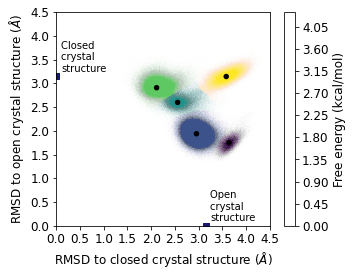

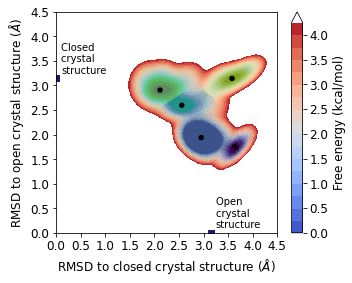

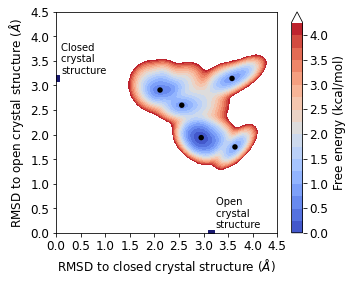

In [68]:
# Visualize free energy landscape with cluster labels
fec.pathways_ = None
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='nipy_spectral', lim=0.1, n_contour_levels=100, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.01, core_point_edgecolor='', 
              colormap2='viridis',clust_point_edgecolor='', clust_point_facecolor='k', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='neither', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=0.0,
              filename='./plots/1-With_IPA/4-free_energy_landscape_with_IPA_cluster_dt1_clean_v1.png', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='coolwarm', lim=0.1, n_contour_levels=19, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.01, core_point_edgecolor='', 
              colormap2='viridis',clust_point_edgecolor='', clust_point_facecolor='k', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/4-free_energy_landscape_with_IPA_cluster_dt1_clean_v2.png', ax=None)

fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.25, colormap='coolwarm', lim=0.1, n_contour_levels=19, show_data=True, 
              figsize= [5, 5], transition_point_size=0, core_point_size=0.0, core_point_edgecolor='', 
              colormap2='viridis',clust_point_edgecolor='', clust_point_facecolor='k', 
              clust_point_size=30, clust_point_linewidth=0, clust_point_marker='o',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10, dx=1,
              core_point_alpha=0.8, transition_point_alpha=0.0, surface_alpha=1,
              filename='./plots/1-With_IPA/4-free_energy_landscape_with_IPA_cluster_dt1_clean_v3.png', ax=None)

In [39]:
# Computing state populations
state_populations = fec.population_states(n_sampled_points=100000)

Sampling points from density.
Assigning cluster labels based on precomputed density model clustering.
Computing state populations.


In [46]:
with open('./pickled/1-With_IPA/state_populations_dt1_alldata.pickle', 'wb') as outf:
    pickle.dump(state_populations, outf)

with open('./pickled/1-With_IPA/labels_dt1_alldata2.pickle', 'wb') as outf:
    pickle.dump(labels, outf)

([<matplotlib.axis.XTick at 0x2afedd150350>,
 <a list of 5 Text major ticklabel objects>)

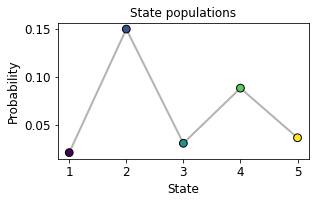

In [40]:
# Plotting the state populations

plt.figure(figsize=[4.5,2.5]);

plt.plot(np.arange(1,state_populations.shape[0]),
         state_populations[1::]/state_populations.sum(),
         linewidth=2,color=[0.7,0.7,0.7],zorder=-1)

plt.scatter(np.arange(1,state_populations.shape[0]),
            state_populations[1::]/state_populations.sum(),
            s=60,c=np.arange(1,state_populations.shape[0]),cmap='viridis',edgecolor='k')

plt.title('State populations',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.ylabel('Probability',fontsize=12)
plt.xticks(np.arange(1,state_populations.shape[0]))

In [26]:
from collections import Counter
Counter(labels)

Counter({0.0: 272843,
         4.0: 28614,
         3.0: 11783,
         2.0: 79486,
         1.0: 7942,
         5.0: 16745})

In [64]:
import mdtraj as md
t= md.load('traj_noeq_IPA_combined.nc', top=topfile)
t

<mdtraj.Trajectory with 417413 frames, 2808 atoms, 192 residues, and unitcells at 0x7fb4152b7110>

In [89]:
os.system('rm '+'./4-full_cluster_trajectories/*.xtc')

0

In [90]:
for i in range(1,6):
    tmp_traj = t[labels == i]
    print(tmp_traj.n_frames)
    if tmp_traj.n_frames > 0:
        tmp_traj.save_xtc("./4-full_cluster_trajectories/cluster"+ str(i) + ".xtc")

7942
79486
11783
28614
16745


In [27]:
rf=[rf0,rf1,rf2,rf3,rf4,rf5]
toplist=sorted(glob('../1-Trajectories/0-Parm_rst/closed6_dry_rot*.parm7'))
toplist

['../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7']

In [28]:
traj_clust_list=sorted(glob("./4-full_cluster_trajectories/cluster*.xtc"))
for t in traj_clust_list:
    print(t[-5])

1
2
3
4
5


In [29]:
new_traj = pt.Trajectory(top=topfile)

In [30]:
new_traj.n_frames

0

In [32]:
# os.system('rm '+'./tmp/*.pdb') 
traj_clust_list=sorted(glob("./4-full_cluster_trajectories/cluster*.xtc"))

for t in traj_clust_list:
    traj_clust = pt.iterload(t, topfile, stride=1)
    new_traj = pt.Trajectory(top=topfile) # Empty trajectory
    
    for i in range(0,traj_clust.n_frames,10):
        
        rmsd0=pt.rmsd(traj_clust[i:i+1],ref=rf0, mask="@CA,N,C,O")
        rmsd1=pt.rmsd(traj_clust[i:i+1],ref=rf1, mask="@CA,N,C,O")
        rmsd2=pt.rmsd(traj_clust[i:i+1],ref=rf2, mask="@CA,N,C,O")
        rmsd3=pt.rmsd(traj_clust[i:i+1],ref=rf3, mask="@CA,N,C,O")
        rmsd4=pt.rmsd(traj_clust[i:i+1],ref=rf4, mask="@CA,N,C,O")
        rmsd5=pt.rmsd(traj_clust[i:i+1],ref=rf5, mask="@CA,N,C,O")
        rmsd_all=np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5])
        ali_struct=np.where(rmsd_all == np.nanmin(rmsd_all, axis=0))
        nb=int(ali_struct[0])

        if nb==0:
            new_frame=pt.align(traj_clust[i:i+1],ref=rf[nb],mask="@CA,N,C,O", top=toplist[nb])
            new_traj.append(new_frame)
#             pt.write_traj('./tmp/{:05d}.pdb'.format(i),new ,  overwrite=True)
            
#     traj_sampled = pt.iterload(sorted(glob('./tmp/*.pdb')), topfile)
    new_traj.save('./5-sampled_cluster_trajectories/sample_cluster{}.xtc'.format(t[-5]), overwrite=True)                     
    print("Fraction original trajectories", float(new_traj.n_frames/traj_clust.n_frames))
#     os.system('rm '+'./tmp/*.pdb')                 

Fraction original trajectories 0.008310249307479225
Fraction original trajectories 0.02565231613114259
Fraction original trajectories 0.09106339641856913
Fraction original trajectories 0.05500803802334522
Fraction original trajectories 0.0


In [35]:
traj_clust_list=sorted(glob("./4-full_cluster_trajectories/cluster*.xtc"))

for t in traj_clust_list:
    traj_clust = pt.iterload(t, topfile, stride=1)
    new_traj = pt.Trajectory(top=topfile) # Empty trajectory
    min_ref=[]
    
    for i in range(0,traj_clust.n_frames,10):
        
        rmsd0=pt.rmsd(traj_clust[i:i+1],ref=rf0, mask="@CA,N,C,O")
        rmsd1=pt.rmsd(traj_clust[i:i+1],ref=rf1, mask="@CA,N,C,O")
        rmsd2=pt.rmsd(traj_clust[i:i+1],ref=rf2, mask="@CA,N,C,O")
        rmsd3=pt.rmsd(traj_clust[i:i+1],ref=rf3, mask="@CA,N,C,O")
        rmsd4=pt.rmsd(traj_clust[i:i+1],ref=rf4, mask="@CA,N,C,O")
        rmsd5=pt.rmsd(traj_clust[i:i+1],ref=rf5, mask="@CA,N,C,O")
        rmsd_all=np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5])
        ali_struct=np.where(rmsd_all == np.nanmin(rmsd_all, axis=0))
        nb=int(ali_struct[0])
        new_frame=pt.align(traj_clust[i:i+1],ref=rf[nb],mask="@CA,N,C,O", top=toplist[nb])
        new_traj.append(new_frame)
        min_ref.append(nb)

    new_traj.save('./4-full_cluster_trajectories/aligned_cluster{}.xtc'.format(t[-5]), overwrite=True)                     
    print("Fraction original trajectories", float(new_traj.n_frames/traj_clust.n_frames))
    with open('./pickled/1-With_IPA/ref_frame_cluster{}.pickle'.format(t[-5]), 'wb') as outf:
        pickle.dump(min_ref, outf)
 

Fraction original trajectories 0.1001007302946361
Fraction original trajectories 0.10000503233273784
Fraction original trajectories 0.10005940762114911
Fraction original trajectories 0.10002096875655274
Fraction original trajectories 0.10002985965959989


In [33]:
0.0083*7942

65.9186

In [29]:
for i in range(0,6):
    tmp_traj = t[labels == i]
    if tmp_traj.n_frames > 0:
        tmp_traj.save_xtc("cluster"+ str(i) + ".xtc")

In [83]:
traj4= pt.iterload('cluster4.xtc', topfile, stride=1)
traj4

pytraj.TrajectoryIterator, 28614 frames: 
Size: 1.795920 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [31]:
rmsd0=pt.rmsd(traj4,ref=rf0, mask="@CA,N,C,O")
rmsd1=pt.rmsd(traj4,ref=rf1, mask="@CA,N,C,O")
rmsd2=pt.rmsd(traj4,ref=rf2, mask="@CA,N,C,O")
rmsd3=pt.rmsd(traj4,ref=rf3, mask="@CA,N,C,O")
rmsd4=pt.rmsd(traj4,ref=rf4, mask="@CA,N,C,O")
rmsd5=pt.rmsd(traj4,ref=rf5, mask="@CA,N,C,O")

In [37]:
rmsd_all=[rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]

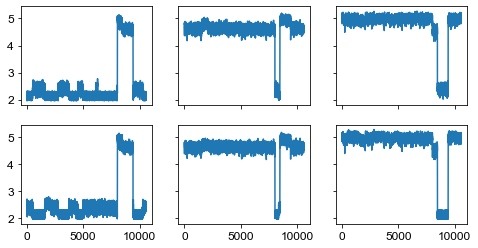

In [41]:
fig, axes = plt.subplots(2, 3, figsize=(8,4), sharex=True, sharey=True)


for i, ax in enumerate(axes.flat):
    ax.plot(rmsd_all[i])

#     ax.set_xlim(0,4.5)
#     ax.set_xticks(np.arange(0, 5, 1))    
#     ax.set_ylim(0,4.5)
#     ax.set_yticks(np.arange(0, 5, 1))     
#     ax.set_aspect('equal')

 
# plt.xlabel(r'RMSD to closed crystal structure ($\AA$)')
# plt.ylabel(r'RMSD to open crystal structure ($\AA$)')
    
# fig.savefig('./plots/2-Without_IPA/3_sampling_of_individual_trajectories_with_overall_FES.png', dpi=600)

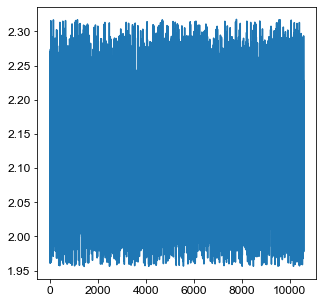

In [49]:
rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
plt.plot(rmsd_closed)

In [111]:
rf=[rf0,rf1,rf2,rf3,rf4,rf5]
toplist=sorted(glob('../1-Trajectories/0-Parm_rst/closed6_dry_rot*.parm7'))
toplist

['../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7',
 '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7']

In [115]:
rf=[rf0,rf1,rf2,rf3,rf4,rf5]
toplist=sorted(glob('../1-Trajectories/0-Parm_rst/closed6_dry_rot*.parm7'))

for i in range(0,traj4.n_frames,100):
# for i in [0,1000,8500]:
    rmsd0=pt.rmsd(traj4[i:i+1],ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj4[i:i+1],ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj4[i:i+1],ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj4[i:i+1],ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj4[i:i+1],ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj4[i:i+1],ref=rf5, mask="@CA,N,C,O")
    rmsd_all=np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5])
    ali_struct=np.where(rmsd_all == np.nanmin(rmsd_all, axis=0))
    nb=int(ali_struct[0])
#     print(int(ali_struct[0]))
    new=pt.align(traj4[i:i+1],ref=rf[nb],mask="@CA,N,C,O", top=toplist[nb])
    pt.write_traj('./tmp/traj4_{}.pdb'.format(i),new ,  overwrite=True)




In [96]:
pt.align(traj4[2:3],ref=rf0, mask="@CA,N,C,O")

pytraj.Trajectory, 1 frames: 
Size: 0.000063 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [116]:
indir_tmp = './tmp'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj4_list = sorted(glob(indir_tmp+'/*.pdb'))
traj4_list


['./tmp/traj4_0.pdb',
 './tmp/traj4_100.pdb',
 './tmp/traj4_1000.pdb',
 './tmp/traj4_10000.pdb',
 './tmp/traj4_10100.pdb',
 './tmp/traj4_10200.pdb',
 './tmp/traj4_10300.pdb',
 './tmp/traj4_10400.pdb',
 './tmp/traj4_10500.pdb',
 './tmp/traj4_1100.pdb',
 './tmp/traj4_1200.pdb',
 './tmp/traj4_1300.pdb',
 './tmp/traj4_1400.pdb',
 './tmp/traj4_1500.pdb',
 './tmp/traj4_1600.pdb',
 './tmp/traj4_1700.pdb',
 './tmp/traj4_1800.pdb',
 './tmp/traj4_1900.pdb',
 './tmp/traj4_200.pdb',
 './tmp/traj4_2000.pdb',
 './tmp/traj4_2100.pdb',
 './tmp/traj4_2200.pdb',
 './tmp/traj4_2300.pdb',
 './tmp/traj4_2400.pdb',
 './tmp/traj4_2500.pdb',
 './tmp/traj4_2600.pdb',
 './tmp/traj4_2700.pdb',
 './tmp/traj4_2800.pdb',
 './tmp/traj4_2900.pdb',
 './tmp/traj4_300.pdb',
 './tmp/traj4_3000.pdb',
 './tmp/traj4_3100.pdb',
 './tmp/traj4_3200.pdb',
 './tmp/traj4_3300.pdb',
 './tmp/traj4_3400.pdb',
 './tmp/traj4_3500.pdb',
 './tmp/traj4_3600.pdb',
 './tmp/traj4_3700.pdb',
 './tmp/traj4_3800.pdb',
 './tmp/traj4_3900.pdb',


In [117]:
traj4_new = pt.iterload(traj4_list, topfile)

In [118]:
traj4_new

pytraj.TrajectoryIterator, 106 frames: 
Size: 0.006653 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [110]:
traj4_new.save('test.xtc', overwrite=True)

In [119]:
new_rmsd=pt.rmsd_nofit(traj4_new,ref=rf0, mask="@CA,N,C,O")

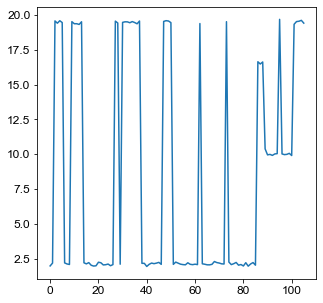

In [120]:
plt.plot(new_rmsd)

In [61]:
indir_tmp = './tmp'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj4_list = sorted(glob(indir_tmp+'/*.pdb'))
traj4_new = pt.iterload(traj_list, topfile, stride=1)
# traj.save('traj_noeq_IPA_combined.nc', overwrite=True)
  

pytraj.Trajectory, 1 frames: 
Size: 0.000063 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, non-PBC>
           

In [76]:
%rm ./tmp/*  

In [ ]:
tmp_traj = traj[labels == i]

if tmp_traj.n_frames > 0:
    tmp_traj.save_dcd("cluster"+ str(i) + ".dcd")

In [16]:
for i in range(0,5):
    traj[cluster_centers[i]:cluster_centers[i]+1].save('./Cluster_centres/Cluster_{}_IPA.pdb'.format(i+1)
                                                       , overwrite=True)

Iteration: 300/300


/home/el14718/Modelling/10-ALKEIG/9-Analysis_all_2/free_energy_clustering/GMM_free_energy.py:642: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  linewidth=4, facecolor='',edgecolor='w', label='Cluster center')


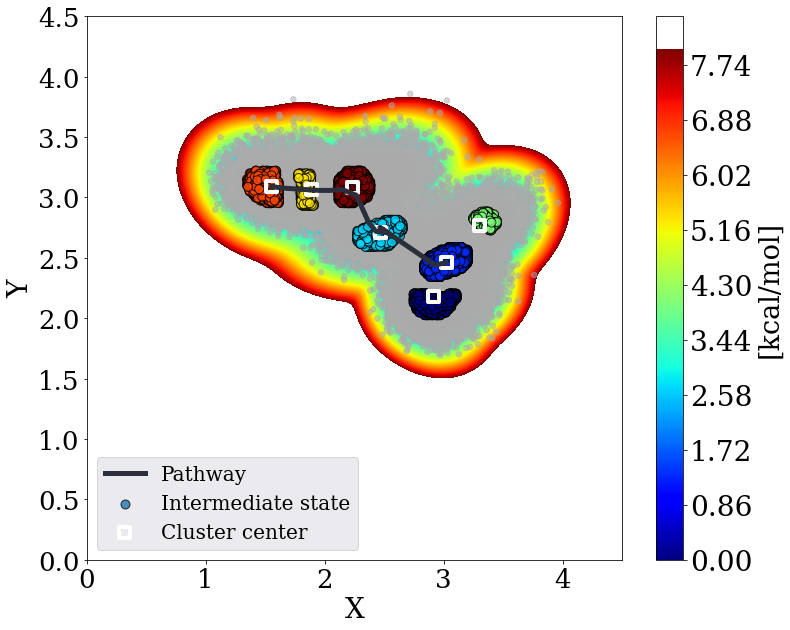

In [55]:
fec.pathways([cluster_centers[0]],[cluster_centers[5]],max_iter=300,
             convergence_tol=1e-4,step_size=2e-2,n_points=20)

fec.visualize(savefig=False, vmax=8, n_contour_levels=1000, show_data=True, xlabel='X', ylabel='Y', filename='pathways', title='')

In [1]:
plt.plot(rmsd_closed_all, rmsd_open_all, marker=".", ms=0.005, ls='None') 

NameError: name 'plt' is not defined

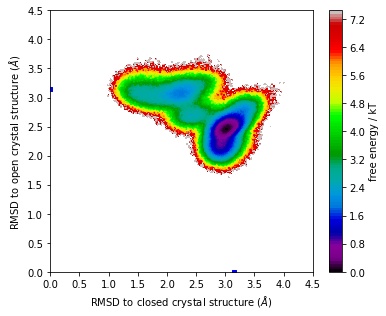

In [12]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [13]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'

traj_list2 = sorted(glob(indir+'/*.nc'))
traj_list2

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [14]:
results_open_ipa=[]
results_closed_ipa=[]
for t in traj_list2:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa.append(rmsd_closed_ipa)
    
    rmsd_open_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa.append(rmsd_open_ipa)

In [15]:
rmsd_open_ipa_all=np.concatenate(results_open_ipa, axis=0)
rmsd_closed_ipa_all=np.concatenate(results_closed_ipa, axis=0)

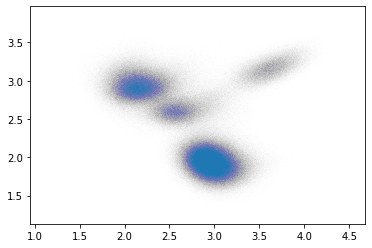

In [59]:
plt.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker=".", ms=0.005, ls='None') 

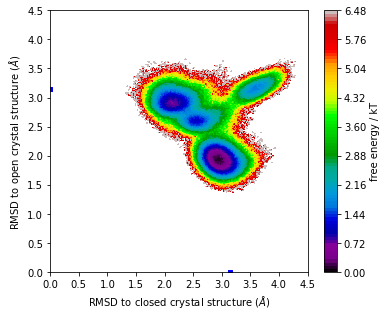

In [60]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_all, rmsd_open_ipa_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cmap.png', dpi=800)

In [18]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))
traj_list3

['./traj_dry_noeq_without_ipa/open_dry_1.nc',
 './traj_dry_noeq_without_ipa/open_dry_10.nc',
 './traj_dry_noeq_without_ipa/open_dry_2.nc',
 './traj_dry_noeq_without_ipa/open_dry_3.nc',
 './traj_dry_noeq_without_ipa/open_dry_4.nc',
 './traj_dry_noeq_without_ipa/open_dry_5.nc',
 './traj_dry_noeq_without_ipa/open_dry_6.nc',
 './traj_dry_noeq_without_ipa/open_dry_7.nc',
 './traj_dry_noeq_without_ipa/open_dry_8.nc',
 './traj_dry_noeq_without_ipa/open_dry_9.nc']

In [19]:
results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

In [20]:
rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

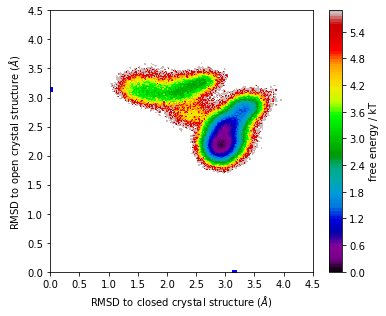

In [21]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_cmap.png', dpi=800)

In [22]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))
traj_list4

['./traj_dry_noeq_without_ipa/closed_dry_1.nc',
 './traj_dry_noeq_without_ipa/closed_dry_10.nc',
 './traj_dry_noeq_without_ipa/closed_dry_2.nc',
 './traj_dry_noeq_without_ipa/closed_dry_3.nc',
 './traj_dry_noeq_without_ipa/closed_dry_4.nc',
 './traj_dry_noeq_without_ipa/closed_dry_5.nc',
 './traj_dry_noeq_without_ipa/closed_dry_6.nc',
 './traj_dry_noeq_without_ipa/closed_dry_7.nc',
 './traj_dry_noeq_without_ipa/closed_dry_8.nc',
 './traj_dry_noeq_without_ipa/closed_dry_9.nc']

In [23]:
results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

In [24]:
rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

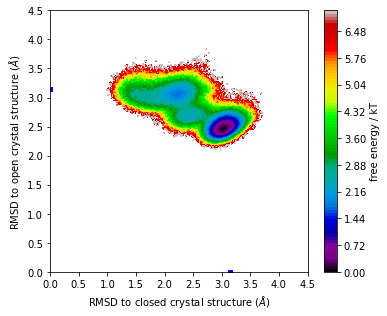

In [25]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_cmap.png', dpi=800)

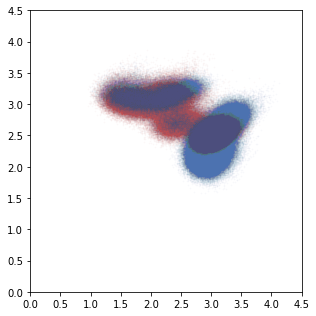

In [26]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/rmsd_fromclosed_fromopen.png', dpi=400)

In [27]:
len(rmsd_closed_closedonly)

497571

In [28]:
len(rmsd_open_closedonly)

497571

In [29]:
len(rmsd_open_openonly)

496163

In [30]:
len(rmsd_closed_openonly)

496163

In [31]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list5 = sorted(glob(indir+'/open*.nc'))
traj_list5

['./traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [32]:
results_open_ipa_openonly=[]
results_closed_ipa_openonly=[]
for t in traj_list5:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_openonly.append(rmsd_closed_ipa_openonly)
    
    rmsd_open_ipa_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_openonly.append(rmsd_open_ipa_openonly)

In [33]:
rmsd_open_ipa_openonly=np.concatenate(results_open_ipa_openonly, axis=0)
rmsd_closed_ipa_openonly=np.concatenate(results_closed_ipa_openonly, axis=0)

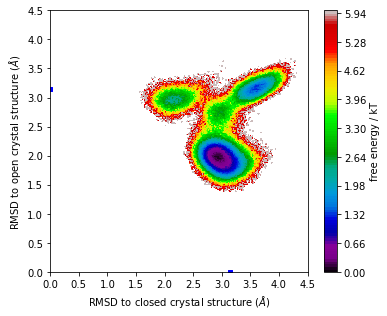

In [34]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_openonly, rmsd_open_ipa_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_ipa_cmap.png', dpi=800)

In [35]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list6 = sorted(glob(indir+'/closed*.nc'))
traj_list6

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc']

In [36]:
results_open_ipa_closedonly=[]
results_closed_ipa_closedonly=[]
for t in traj_list6:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_closedonly.append(rmsd_closed_ipa_closedonly)
    
    rmsd_open_ipa_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_closedonly.append(rmsd_open_ipa_closedonly)

In [37]:
rmsd_open_ipa_closedonly=np.concatenate(results_open_ipa_closedonly, axis=0)
rmsd_closed_ipa_closedonly=np.concatenate(results_closed_ipa_closedonly, axis=0)

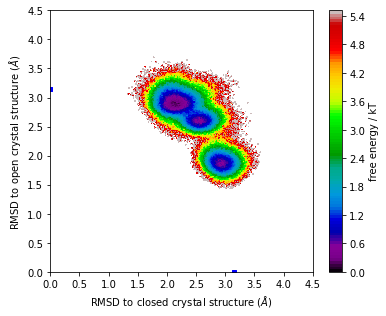

In [38]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_closedonly, rmsd_open_ipa_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_ipa_cmap.png', dpi=800)

In [39]:
len(rmsd_closed_ipa_closedonly)

500000

In [40]:
len(rmsd_open_ipa_closedonly)

500000

In [41]:
len(rmsd_closed_ipa_openonly)

500000

In [42]:
for i in range(0,len(results_open_ipa_openonly)):
    print(len(results_open_ipa_openonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [43]:
for i in range(0,len(results_open_ipa_closedonly)):
    print(len(results_open_ipa_closedonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [44]:
indir = './rep_struct_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list7 = sorted(glob(indir+'/*.pdb'))
traj_list7

['./rep_struct_1/0.pdb',
 './rep_struct_1/1.pdb',
 './rep_struct_1/2.pdb',
 './rep_struct_1/3.pdb',
 './rep_struct_1/4.pdb',
 './rep_struct_1/5.pdb']

In [45]:
results_open_rep_struct=[]
results_closed_rep_struct=[]
for t in traj_list7:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct.append(rmsd_closed_rep_struct)
    
    rmsd_open_rep_struct=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct.append(rmsd_open_rep_struct)

In [46]:
rmsd_open_rep_struct=np.concatenate(results_open_rep_struct, axis=0)
rmsd_closed_rep_struct=np.concatenate(results_closed_rep_struct, axis=0)

In [47]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

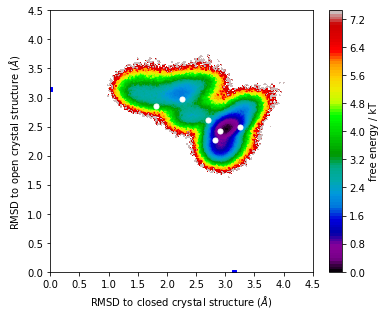

In [48]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct, rmsd_open_rep_struct, linewidth=0, marker='o', markersize=5, color='white')

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
# fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [49]:
indir = './rep_struct_ipa_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list8 = sorted(glob(indir+'/*.pdb'))
traj_list8

['./rep_struct_ipa_1/0.pdb',
 './rep_struct_ipa_1/1.pdb',
 './rep_struct_ipa_1/2.pdb',
 './rep_struct_ipa_1/3.pdb']

In [50]:
results_open_rep_struct_ipa=[]
results_closed_rep_struct_ipa=[]
for t in traj_list8:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct_ipa.append(rmsd_closed_rep_struct_ipa)
    
    rmsd_open_rep_struct_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct_ipa.append(rmsd_open_rep_struct_ipa)

In [51]:
rmsd_open_rep_struct_ipa=np.concatenate(results_open_rep_struct_ipa, axis=0)
rmsd_closed_rep_struct_ipa=np.concatenate(results_closed_rep_struct_ipa, axis=0)

In [52]:
rmsd_open_rep_struct_ipa

array([2.1590297 , 1.8054539 , 2.69445467, 2.66681716])

In [53]:
rmsd_closed_rep_struct_ipa

array([2.4567451 , 2.90197249, 3.38740526, 2.10944768])

In [54]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

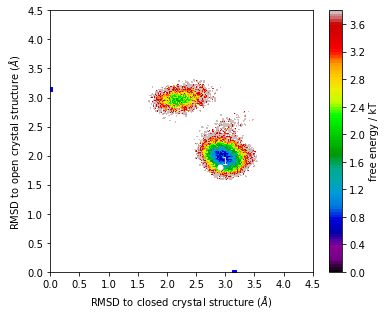

In [55]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa, rmsd_open_ipa, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

In [56]:
Y_ipa=[]
for i in range(0,len(results_open_ipa)):  
    Z_ipa=[]
    for j in range(0,len(results_open_ipa[i])):
        a_ipa=np.array([results_closed_ipa[i][j],results_open_ipa[i][j]])
        Z_ipa.append(a_ipa)
    Z_ipa=np.array(Z_ipa)
    Y_ipa.append(Z_ipa)

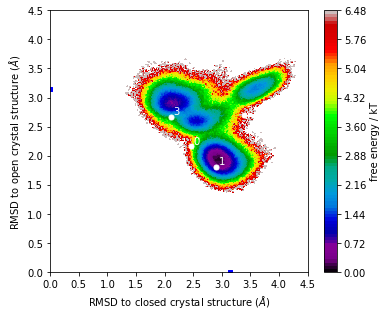

In [57]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

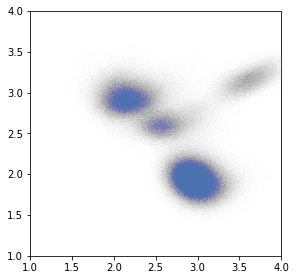

In [74]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02)


ax.set_xlim(1,4)
ax.set_ylim(1, 4)


fig.savefig('./plots/rmsd_w_IPA.png', dpi=400)

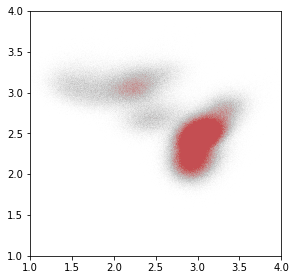

In [69]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

# ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_wo_IPA.png', dpi=400)

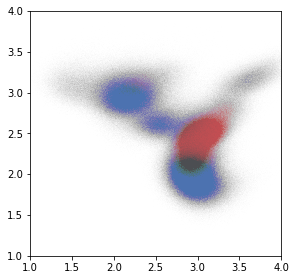

In [73]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_w_wo_IPA.png', dpi=400)

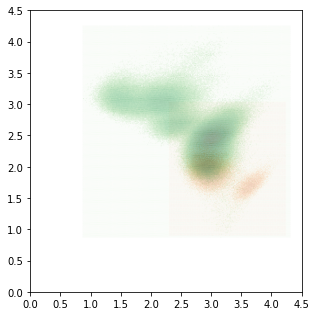

In [147]:
fig,ax=plt.subplots(figsize=(4.5,4.5))


ax.hexbin(rmsd_closed_ipa, rmsd_open_ipa, cmap="Oranges", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 
ax.hexbin(rmsd_closed, rmsd_open,cmap="Greens", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 



ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

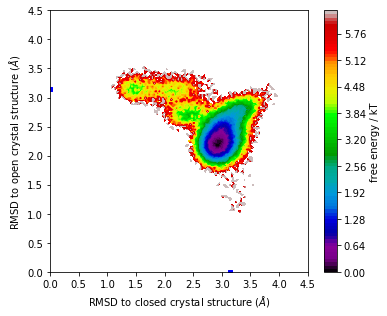

In [15]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))

results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_dt2_cmap.png', dpi=800)

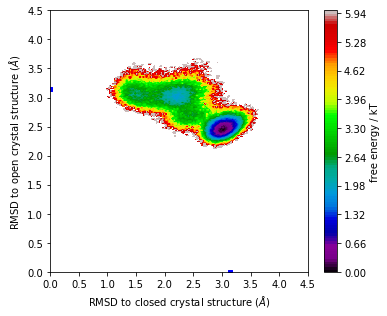

In [16]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))

results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_dt2_cmap.png', dpi=800)

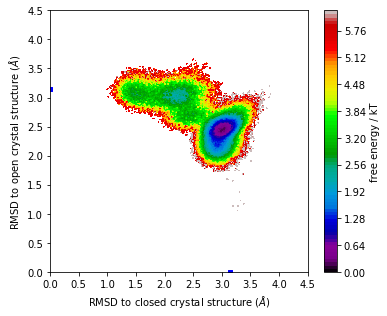

In [17]:
traj_list=traj_list4+traj_list3
for t in traj_list:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedopenonly_dt2_cmap.png', dpi=800)

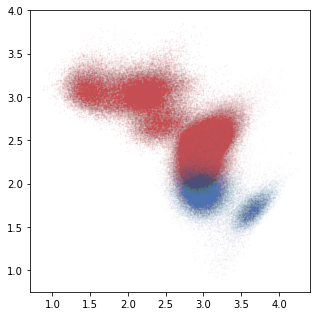

In [18]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
#ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()